In [74]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)
pic_ind = 0

# Лабораторная работа $№7$ 

# «Симплекс-метод»
<font size="4">**Вариант $№6$**</font>

Найти с заданной точностью точку минимума и минимальное значение целевой функции методами:
    
    • регулярный симплекс;
    
    • нерегулярный симплекс (метод Нелдера-Мида).

Начинать всегда с квадратичной функции (аналитически для нее найти точное решение, с котором сравнивать полученное численное). Далее исследовать функцию Розенброка  $f(x,y)= \alpha (x^2 - y)^2 + (x-1)^2$ различными параметрами $\alpha$. При исследовании для каждой функции брать два параметра точности поиска $\varepsilon = 0.01$ и $\varepsilon = 0.00001$. 
 
   Также для каждой функции и каждого параметра точности поиска взять две различные (существенно различные) начальные точки. Начальные точки выбрать самостоятельно. В методах, в которых необходимо проводить одномерную минимизацию (например в наискорейшем спуске), использовать свой метод золотого сечения, реализованный в лабораторной работе №1.

   В результате исследований должно быть выявлено влияние на стоимость методов (количество вычисленных значений целевой функции)
    
   • параметров точности поиска;
    
   • начальной точки;
    
   • выпуклости (переход от квадратичной функции к функции Розенброка);
    
   • овражности функции (параметра  в функции Розенброка).

# Постановка задачи
1) $f_1(x, y) = 5x^2 + 4xy + 2y^2 + 4\sqrt5 (x+y) + 51$;

   $f_1(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.
 
$\phantom{x}$ 
2) $f_2(x, y) = \alpha (x^2 - y)^2 + (x-1)^2$, $\phantom{x}\alpha \in \{1, 20\}$;

   $\phantom{xxi}$ $f_2(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.


In [75]:
import numpy as np

def f1_pl(x, y):
    return 5*x*x + 4*x*y + 2*y*y + 4*np.sqrt(5)*(x+y) + 51
def f21_pl(x, y):
    return (x*x - y)**2 + (x-1)**2
def f22_pl(x, y):
    return 20*(x*x - y)**2 + (x-1)**2

In [76]:
eps1 = 0.01
eps2 = 10**(-5)

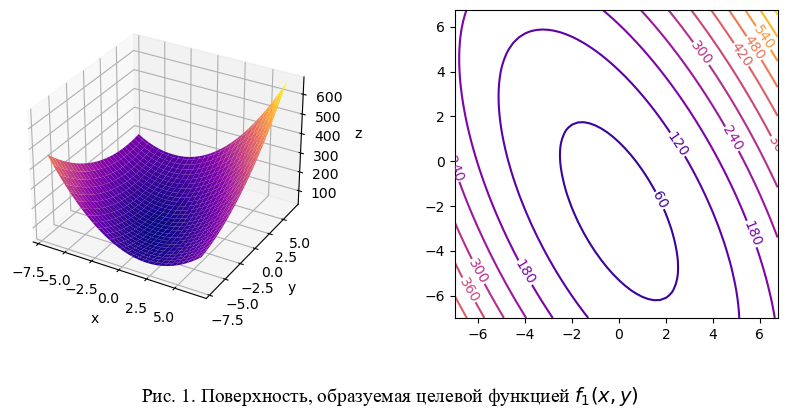

In [77]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
F1 = np.vectorize(f1_pl)
Z = F1(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 1. Поверхность, образуемая целевой функцией $f_1(x,y)$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
plt.show()

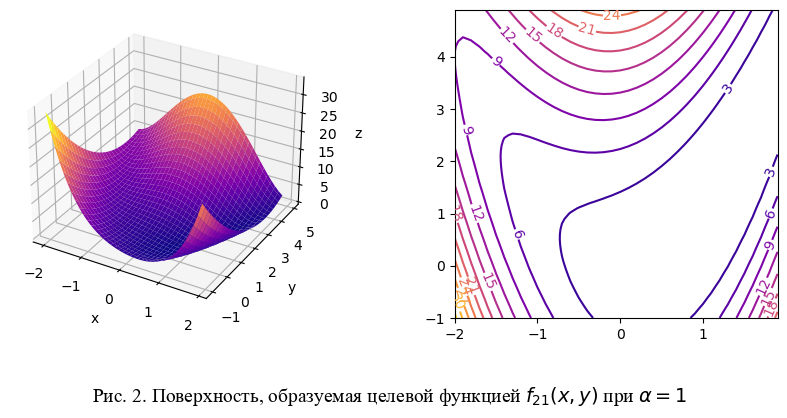

In [78]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F2 = np.vectorize(f21_pl)
Z = F2(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 2. Поверхность, образуемая целевой функцией $f_{21}(x,y)$ при $α = 1$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
 
plt.show()

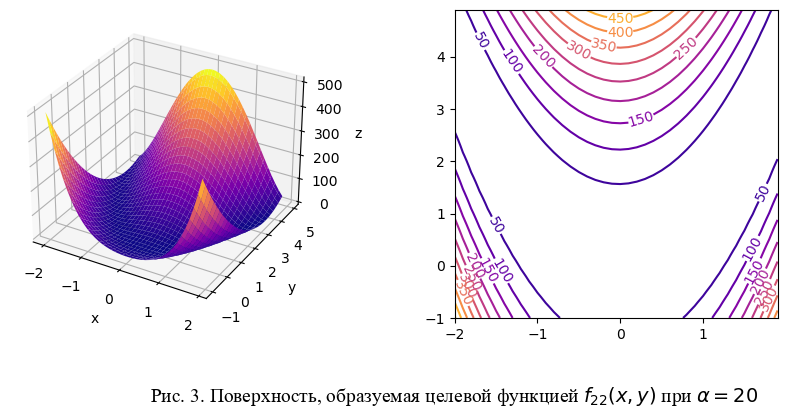

In [79]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F22 = np.vectorize(f22_pl)
Z = F22(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=10, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 3. Поверхность, образуемая целевой функцией $f_{22}(x,y)$ при $α = 20$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = 0)
 
plt.show()

In [80]:
def f1(x):
    return 5*x[0]*x[0] + 4*x[0]*x[1] + 2*x[1]*x[1] + 4*np.sqrt(5)*(x[0]+x[1]) + 51
def f21(x):
    return (x[0]*x[0] - x[1])**2 + (x[0]-1)**2
def f22(x):
    return 20*(x[0]*x[0] - x[1])**2 + (x[0]-1)**2

In [81]:
def GoldenRatioMinSearch(func, a, b, eps):
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    while length >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
        length = b - a
    return (a+b)/2

def ConstSizeRegularSimplexMinSearch(func, x0, eps):
    x = x0
    l = 2
    f = func(x0)
    k = 0
    def SimplexCreate(base_point, l):
        x1 = np.array([base_point[0] - np.sqrt(1/4)*l, base_point[1] - np.sqrt(1/(2*2*3))*l])
        x2 = np.array([base_point[0] + np.sqrt(1/(2*(1+1)))*l, base_point[1]-np.sqrt(1/(2*2*(2+1)))*l])
        x3 = np.array([base_point[0], base_point[1] + np.sqrt(2/(2*(2+1)))*l])
        return x1, x2, x3
    
    x1, x2, x3 = SimplexCreate(x0, l)
    vertices = [x1, x2, x3]
    vertices.sort(key = lambda x: func(x))
    while True:   
        x_sym = sum(vertices[0:2]) - vertices[-1]
        vertices_prev = vertices
        if (func(x_sym) >= func(vertices_prev[-1])):
            x_sym = vertices_prev[0] + vertices_prev[2] - vertices_prev[1]
            vertices = [vertices_prev[0], vertices_prev[2], x_sym]
            if (func(x_sym) >= func(vertices_prev[1])):
                x_sym = vertices_prev[1] + vertices_prev[2] - vertices_prev[0]
                vertices = [vertices_prev[1], vertices_prev[2], x_sym]
                if (func(x_sym) >= func(vertices_prev[0])):
                    break
        else: vertices[-1] = x_sym
            
        vertices.sort(key = lambda x: func(x))
        #print(vertices)
        k += 1
        if k >= 10000: break

    #new_vertices = [vertices[0], vertices[1], x_sym]
    return vertices[0], func(vertices[0]), k
####################################################
def RegularSimplexMinSearch(func, x0, eps):
    x = x0
    l = 2
    delta = 0.2
    f = func(x0)
    k = 0
    def SimplexCreate(base_point, l):
        x1 = np.array([base_point[0] - np.sqrt(1/4)*l, base_point[1] - np.sqrt(1/(2*2*3))*l])
        x2 = np.array([base_point[0] + np.sqrt(1/(2*(1+1)))*l, base_point[1]-np.sqrt(1/(2*2*(2+1)))*l])
        x3 = np.array([base_point[0], base_point[1] + np.sqrt(2/(2*(2+1)))*l])
        return x1, x2, x3
    
    x1, x2, x3 = SimplexCreate(x0, l)
    vertices = [x1, x2, x3]
    vertices.sort(key = lambda x: func(x))
    while True:   
        x = sum(vertices[0:3])/3
        if np.sqrt(sum([(func(x_i)-func(x))**2 for x_i in vertices])/3)< eps: break
        x_sym = sum(vertices[0:2]) - vertices[-1]
        vertices_prev = vertices
        
        if (func(x_sym) >= func(vertices_prev[-1])):
            vertices[1] = vertices_prev[0] + delta*(vertices_prev[1] - vertices[0])
            vertices[2] = vertices_prev[0] + delta*(vertices_prev[2] - vertices[0])
            vertices.sort(key = lambda x: func(x))
            continue
        
        vertices[-1] = x_sym
        vertices.sort(key = lambda x: func(x))
        
        
        k += 1
        if k >= 10000: break

    #new_vertices = [vertices[0], vertices[1], x_sym]
    return vertices[0], func(vertices[0]), k
####################################################
def IrregularSimplexMinSearch(func, x0, eps):
    def SimplexCreate(base_point, l):
        x1 = np.array([base_point[0] - np.sqrt(1/4)*l, base_point[1] - np.sqrt(1/(2*2*3))*l])
        x2 = np.array([base_point[0] + np.sqrt(1/(2*(1+1)))*l, base_point[1]-np.sqrt(1/(2*2*(2+1)))*l])
        x3 = np.array([base_point[0], base_point[1] + np.sqrt(2/(2*(2+1)))*l])
        return x1, x2, x3
    l = 1
    n = 2
    N = 10
    delta = 0.5
    alpha = 1
    betta = 2
    gamma = 0.75
#     alpha = 2
#     betta = 5/2
#     gamma = 1/4
    k = 0
    x1, x2, x3 = SimplexCreate(x0, l)
    vertices = [x1, x2, x3]

    while True:
        k += 1
        if k >= 1000: break
        x = sum(vertices[0:3])/3
        if np.sqrt(sum([(func(x_i)-func(x))**2 for x_i in vertices])/3)< eps: break
        
#         if k % N == 0:
#             l = np.linalg.norm(vertices[0]-vertices[1])
#             x1, x2, x3 = SimplexCreate(x, l)
#             vertices = [x1, x2, x3]

        vertices.sort(key = lambda x: func(x))
        
        x_sym = (1+alpha)/n * sum(vertices[0:n]) - alpha*vertices[-1]
        
        if func(x_sym) < func(vertices[0]):
            #растяжение
            x_star = (1-betta)/n *sum(vertices[0:n]) + betta * x_sym
            if func(x_star) < func(vertices[0]):
                vertices[-1] = x_star
                continue
            vertices[-1] = x_sym
            
        elif func(vertices[-2]) >= func(x_sym) and func(x_sym) >= func(vertices[0]):
            #берём симлекс с новой последней вершиной и идём к этапу 1
            vertices[-1] = x_sym
            continue
            
        elif func(x_sym) > func(vertices[-2]) and func(vertices[-2]) >= func(vertices[0]):
            #сжатиеее
            if func(x_sym) <= func(vertices[-1]):
                x_star = (1-gamma)/n * sum(vertices[0:n]) + gamma*x_sym
            else:
                x_star = (1-gamma)/n * sum(vertices[0:n]) + gamma*vertices[-1]
            
            if func(x_star) < func(vertices[-1]):
                vertices[-1] = x_star
                continue
                
        vertices[1] = vertices[0] + delta*(vertices[1] - vertices[0])
        vertices[2] = vertices[0] + delta*(vertices[2] - vertices[0])
        
        

    return x, func(x), k
            

# Анализ методов

In [92]:
def InfoGoldenRatioMinSearch(func, a, b, eps):
    fcalls = 0
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    fcalls += 2
    while length >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
            fcalls += 1
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
            fcalls += 1
        length = b - a
    res = (a+b)/2
    return res, fcalls


####################################################
def InfoRegularSimplexMinSearch(func, x0, eps, l=2, delta = 0.9):
    x = x0
    xs = [x]
    triangulars = []
    f = func(x0)
    fcalls = 0
    k = 0
    def SimplexCreate(base_point, l):
        x1 = np.array([base_point[0] - np.sqrt(1/4)*l, base_point[1] - np.sqrt(1/(2*2*3))*l])
        x2 = np.array([base_point[0] + np.sqrt(1/(2*(1+1)))*l, base_point[1]-np.sqrt(1/(2*2*(2+1)))*l])
        x3 = np.array([base_point[0], base_point[1] + np.sqrt(2/(2*(2+1)))*l])
        return x1, x2, x3
    
    x1, x2, x3 = SimplexCreate(x0, l)
    vertices = [x1, x2, x3]
    vertices.sort(key = lambda x: func(x))
    triangulars = []
    while True:   
        triangulars.append([vertices[0], vertices[1], vertices[2]])
        x = sum(vertices[0:3])/3
        if np.sqrt(sum([(func(x_i)-func(x))**2 for x_i in vertices])/3)< eps: break
        fcalls += 2
        x_sym = sum(vertices[0:2]) - vertices[-1]
        vertices_prev = vertices
        fcalls += 2
        if (func(x_sym) >= func(vertices_prev[-1])):
            vertices[1] = vertices_prev[0] + delta*(vertices_prev[1] - vertices[0])
            vertices[2] = vertices_prev[0] + delta*(vertices_prev[2] - vertices[0])
            vertices.sort(key = lambda x: func(x))
            continue
        
        vertices[-1] = x_sym
        vertices.sort(key = lambda x: func(x))
        xs.append(x)
        k += 1
        if k >= 10000: break

    #new_vertices = [vertices[0], vertices[1], x_sym]
    return vertices[0], func(vertices[0]), k, xs, fcalls, triangulars
####################################################
def InfoIrregularSimplexMinSearch(func, x0, eps, l =1, delta = 0.7, alpha = 1, betta = 2, gamma = 0.75):
    def SimplexCreate(base_point, l):
        x1 = np.array([base_point[0] - np.sqrt(1/4)*l, base_point[1] - np.sqrt(1/(2*2*3))*l])
        x2 = np.array([base_point[0] + np.sqrt(1/(2*(1+1)))*l, base_point[1]-np.sqrt(1/(2*2*(2+1)))*l])
        x3 = np.array([base_point[0], base_point[1] + np.sqrt(2/(2*(2+1)))*l])
        return x1, x2, x3
    n = 2
    N = 10
#     alpha = 2
#     betta = 5/2
#     gamma = 1/4
    k = 0
    x1, x2, x3 = SimplexCreate(x0, l)
    vertices = [x1, x2, x3]
    triangulars = []
    fcalls = 0
    xs = [x0]
    while True:
        triangulars.append([vertices[0], vertices[1], vertices[2]])
        k += 1
        if k >= 10000: break
        x = sum(vertices[0:3])/3
        xs.append(x)
        if np.sqrt(sum([(func(x_i)-func(x))**2 for x_i in vertices])/3)< eps: break
        
#         if k % N == 0:
#             l = np.linalg.norm(vertices[0]-vertices[1])
#             x1, x2, x3 = SimplexCreate(x, l)
#             vertices = [x1, x2, x3]

        vertices.sort(key = lambda x: func(x))
        
        x_sym = (1+alpha)/n * sum(vertices[0:n]) - alpha*vertices[-1]
        fcalls += 2
        if func(x_sym) < func(vertices[0]):
            #растяжение
            x_star = (1-betta)/n *sum(vertices[0:n]) + betta * x_sym
            fcalls += 2
            if func(x_star) < func(vertices[0]):
                vertices[-1] = x_star
                continue
            vertices[-1] = x_sym
        fcalls += 4    
        if func(vertices[-2]) >= func(x_sym) and func(x_sym) >= func(vertices[0]):
            #берём симлекс с новой последней вершиной и идём к этапу 1
            vertices[-1] = x_sym
            continue
        fcalls += 4    
        if func(x_sym) > func(vertices[-2]) and func(vertices[-2]) >= func(vertices[0]):
            #сжатиеее
            fcalls += 2
            if func(x_sym) <= func(vertices[-1]):
                x_star = (1-gamma)/n * sum(vertices[0:n]) + gamma*x_sym
            else:
                x_star = (1-gamma)/n * sum(vertices[0:n]) + gamma*vertices[-1]
            fcalls += 2
            if func(x_star) < func(vertices[-1]):
                vertices[-1] = x_star
                continue
                
        vertices[1] = vertices[0] + delta*(vertices[1] - vertices[0])
        vertices[2] = vertices[0] + delta*(vertices[2] - vertices[0])
        

    return x, func(x), k, xs, fcalls, triangulars


#########
def InfoIrregularSimplexMinSearch(foo, point, precision, l =1, delta = 0.7, alpha = 1, beta = 2, gamma = 0.75, maxiter=3000):
    iterations = 0
    values = 0
    points = [point]
    x_1_1 = np.array(point)
    n_1 = l * (np.sqrt(2 + 1) - 1) / (2 * np.sqrt(2))
    n_2 = l * (np.sqrt(2 + 1) - 1 + 2) / (2 * np.sqrt(2))
    x_1_2 = np.array((x_1_1[0] + n_1, x_1_1[1] + n_2))
    x_1_3 = np.array((x_1_1[1] + n_2, x_1_1[0] + n_1))
    s_k = sorted([[foo(*x_1_1), x_1_1], [foo(*x_1_2), x_1_2],
                 [foo(*x_1_3), x_1_3]], key=lambda x: x[0], 
                        reverse=True)
    s = [s_k]
    values += 3
    
    while iterations < maxiter:
        iterations += 1
        # 1 точка
        x_1_np1 = s_k[0][1]
        x_c = (s_k[1][1] + s_k[2][1]) / 2
        z_1 = x_c - alpha * (x_c - x_1_np1)
        z_2 = x_c + alpha * (x_c - x_1_np1)
        z_3 = x_c + beta * (x_c - x_1_np1)
        z_4 = x_c + gamma * (x_c - x_1_np1)
        x_2_np1 = sorted([[foo(*z_1), z_1], [foo(*z_2), z_2],
                     [foo(*z_3), z_3], [foo(*z_4), z_4]], key=lambda x: x[0])[0][1]
        if foo(*x_2_np1) < foo(*x_1_np1):
            x_1_1 = x_2_np1
            points.append(x_1_1)
            x_1_2 = s[-1][1][1]
            x_1_3 = s[-1][2][1]
            s_k = sorted([[foo(*x_1_1), x_1_1], [foo(*x_1_2), x_1_2],
                     [foo(*x_1_3), x_1_3]], key=lambda x: x[0], 
                            reverse=True)
            values += 3
        else:
            # 2 точка
            x_1_np1 = s_k[1][1]
            x_c = (s_k[0][1] + s_k[2][1]) / 2
            z_1 = x_c - alpha * (x_c - x_1_np1)
            z_2 = x_c + alpha * (x_c - x_1_np1)
            z_3 = x_c + beta * (x_c - x_1_np1)
            z_4 = x_c + gamma * (x_c - x_1_np1)
            x_2_np1 = sorted([[foo(*z_1), z_1], [foo(*z_2), z_2],
            [foo(*z_3), z_3], [foo(*z_4), z_4]], key=lambda x: x[0])[0][1]

            if foo(*x_2_np1) < foo(*x_1_np1):
                x_1_1 = x_2_np1
                points.append(x_1_1)
                x_1_2 = s[-1][1][1]
                x_1_3 = s[-1][2][1]
                s_k = sorted([[foo(*x_1_1), x_1_1], [foo(*x_1_2), x_1_2],
                [foo(*x_1_3), x_1_3]], key=lambda x: x[0], 
                reverse=True)
                values += 3
            else:
                # 3 точка
                x_1_np1 = s_k[2][1]
                x_c = (s_k[0][1] + s_k[1][1]) / 2
                z_1 = x_c - alpha * (x_c - x_1_np1)
                z_2 = x_c + alpha * (x_c - x_1_np1)
                z_3 = x_c + beta * (x_c - x_1_np1)
                z_4 = x_c + gamma * (x_c - x_1_np1)
                x_2_np1 = sorted([[foo(*z_1), z_1], [foo(*z_2), z_2],
                [foo(*z_3), z_3], [foo(*z_4), z_4]], key=lambda x: x[0])[0][1]

                if foo(*x_2_np1) < foo(*x_1_np1):
                    x_1_1 = x_2_np1
                    points.append(x_1_1)
                    x_1_2 = s[-1][1][1]
                    x_1_3 = s[-1][2][1]
                    s_k = sorted([[foo(*x_1_1), x_1_1], [foo(*x_1_2), x_1_2],
                    [foo(*x_1_3), x_1_3]], key=lambda x: x[0], 
                    reverse=True)
                    values += 3
                else:
                    l = l * delta
                    x_1_2 = (1 - delta) * x_1_1 + delta * x_1_2
                    x_1_3 = (1 - delta) * x_1_1 + delta * x_1_3
                    s_k = sorted([[foo(*x_1_1), x_1_1], [foo(*x_1_2), x_1_2],
                    [foo(*x_1_3), x_1_3]], key=lambda x: x[0], 
                        reverse=True)
                    values += 3
        
        s.append(s_k)
        point = sorted([[foo(*x_1_1), x_1_1], [foo(*x_1_2), x_1_2],
                     [foo(*x_1_3), x_1_3]], key=lambda x: x[0])[0][1]
        #if np.power((foo(*x_1_2) - foo(*x_1_1)) ** 2 + (foo(*x_1_3) - foo(*x_1_1)) ** 2, 0.5) / 3 < precision:
         #   break
        
        s_k = sorted([[foo(*x_1_1), x_1_1], [foo(*x_1_2), x_1_2],
                 [foo(*x_1_3), x_1_3]], key=lambda x: x[0], 
                        reverse=True)
        st = (s_k[1][1] - s_k[2][1]) / 2
        x = (x_1_1 +  x_1_2 + x_1_3) / 3
        f_x = [foo(*s_k[0][1]), foo(*s_k[1][1]), foo(*s_k[2][1])]
        # print(np.sqrt(sum([(foo(*st) - p) ** 2 for p in f_x])))
        if np.sqrt(sum([(foo(*st) - p) ** 2 for p in f_x])) < precision    or np.sqrt(sum([(foo(*x) - p) ** 2 for p in f_x])) < 0.00001*precision:
            break
            
    return point, foo(*point), iterations,points, values, s 

In [124]:
import matplotlib
import matplotlib.patches as mpatches
ind = 4
def ExperimentPlot(func, xmin, xmax, ymin, ymax, n1, n2,
                   x1, x2, trs1, trs2,
                    ind, xstart, ystart,
                    xspacing, yspacing, fnum = 1, eps = 2):
    xs1 = [el[0] for el in x1]
    ys1 = [el[1] for el in x1]
    xs2 = [el[0] for el in x2]
    ys2 = [el[1] for el in x2]
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(9, 5))
    tmp_trs2 = trs2.copy()
    print(trs2)  
    for i in range(len(trs2)):
        for j in range(len(trs2[i])):
            trs2[i]trs1[2][j][1])
    print(trs2)
    for _ in trs1:
        p = mpatches.Polygon(_ ,facecolor="none", 
              edgecolor='green', lw=1, zorder=2)
        ax[0].add_patch(p)
    
    for _ in trs2:
        p = mpatches.Polygon(_ ,facecolor="none", 
              edgecolor='green', lw=1, zorder=2)
        ax[1].add_patch(p)
    
    levels1 = []
    levels2 = []
    

    ax[0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=2)
    ax[0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=2)
    ax[1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=2)
    
    for i in range(0, n1):
        levels1.append(func(xs1[i], ys1[i]))
        ax[0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels1 = list(set(levels1))
    levels1.sort()
    CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels1, zorder=1)
    ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
    
    for i in range(0,n2):
        levels2.append(func(xs2[i], ys2[i]))
        ax[1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels2 = list(set(levels2))
    levels2.sort()
    CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=levels2, zorder=1)
    ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)


    ax[0].annotate('$p_{min}$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
    ax[0].annotate('$p_{start}$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
    ax[0].set_xlabel('x \n \n a)')
    
    ax[1].annotate('$p_{min}$', xytext=(xs2[-1]+xspacing, ys2[-1]-yspacing), xy=(xs2[-1], ys2[-1]))
    ax[1].annotate('$p_{start}$', xytext=(xs2[0]+xspacing, ys2[0]-yspacing), xy=(xs2[0], ys2[0]))
    ax[1].set_xlabel('x \n \n б)')
    
    
    ax[0].set_ylabel('y')
    ax[1].set_ylabel('y')
    
       
    plt.title(f'Рис. {ind}.'+' Траектория поиска точки минимума функции $f_{'+f'{fnum}'+'}(x, y)$ методом \n \
    регулярного симплекса(а), Нелдера-Мида(б),\n $ε=10^{'+f'{-eps}'+'}$, $p_{start}=($'+f'{xstart}, {ystart}'+'$)$',
                 fontsize=14, fontname='Times New Roman',y=-0.56, x = 0)
    plt.tight_layout()
    plt.subplots_adjust( wspace=0.3,bottom=0.3)
    plt.show()

In [125]:
xmin1_f1, fmin1_f1, its1_f1, xs1_f1, fls1_f1, trngs1_f1 = InfoRegularSimplexMinSearch(f1, [-4, 2.5], eps1)

In [126]:
xmin2_f1, fmin2_f1, its2_f1, xs2_f1, fls2_f1, trngs2_f1 = InfoIrregularSimplexMinSearch(f1_pl, [-4, 2.5], eps1)

[[[90.67887886861789, array([-3.74118095,  3.46592583])], [90.08359213500125, array([-4. ,  2.5])], [84.72749955676773, array([ 3.46592583, -3.74118095])]], [[90.08359213500125, array([-4. ,  2.5])], [84.72749955676773, array([ 3.46592583, -3.74118095])], [58.9879552339685, array([ 2.33857081, -3.68547771])]], [[75.72260703622607, array([ 3.12771932, -3.72446998])], [58.9879552339685, array([ 2.33857081, -3.68547771])], [55.43324493590709, array([-2.09842876,  0.64435669])]], [[58.9879552339685, array([ 2.33857081, -3.68547771])], [55.43324493590709, array([-2.09842876,  0.64435669])], [54.79156524818099, array([-2.13566519,  0.1323716 ])]], [[55.43324493590709, array([-2.09842876,  0.64435669])], [54.79156524818099, array([-2.13566519,  0.1323716 ])], [50.514188155772, array([ 1.75136399, -3.59223536])]], [[54.79156524818099, array([-2.13566519,  0.1323716 ])], [50.514188155772, array([ 1.75136399, -3.59223536])], [45.59739081572687, array([ 1.23755801, -3.51064831])]], [[48.794369566

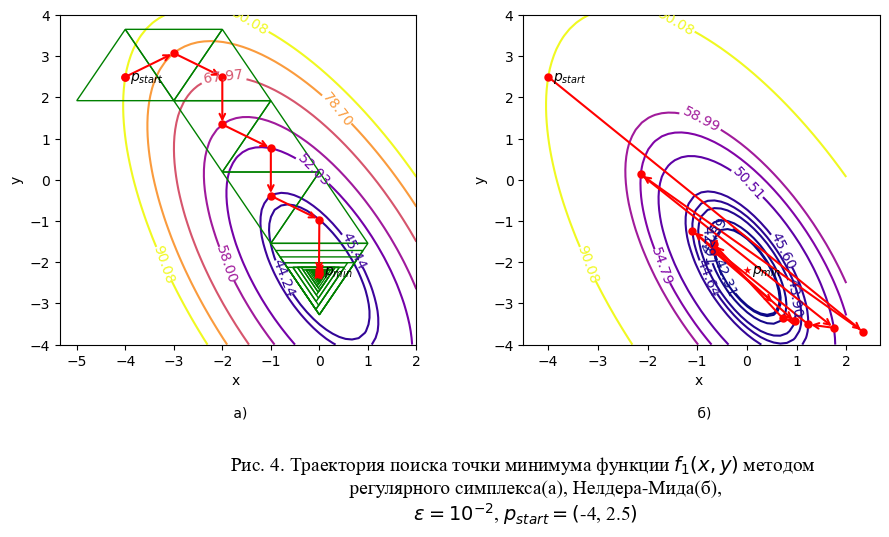

In [127]:
ExperimentPlot(f1_pl, xmin=-4.5, xmax=2, ymin=-4, ymax=4, n1=its1_f1, n2=10,
                   x1=xs1_f1, x2=xs2_f1, trs1=trngs1_f1, trs2 = trngs2_f1,
                    ind=ind, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps = 2)

In [ ]:
xmin3_f1, fmin3_f1, its3_f1, xs3_f1, fls3_f1, trngs3_f1 = InfoRegularSimplexMinSearch(f1, [-4, 2.5], eps2)

In [ ]:
xmin4_f1, fmin4_f1, its4_f1, xs4_f1, fls4_f1, trngs4_f1 = InfoIrregularSimplexMinSearch(f1, [-4, 2.5], eps2)

In [ ]:
ExperimentPlot(f1_pl, xmin=-4.5, xmax=2, ymin=-4, ymax=4, n1=its3_f1, n2=its4_f1,
                   x1=xs3_f1, x2=xs4_f1, trs1=trngs3_f1, trs2 = trngs4_f1,
                    ind=ind, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps = 5)

In [ ]:
xmin5_f1, fmin5_f1, its5_f1, xs5_f1, fls5_f1, trngs5_f1 = InfoRegularSimplexMinSearch(f1, [3, -1], eps1)

In [ ]:
xmin6_f1, fmin6_f1, its6_f1, xs6_f1, fls6_f1, trngs6_f1 = InfoIrregularSimplexMinSearch(f1, [3, -1], eps1)

In [ ]:
ExperimentPlot(f1_pl, xmin=-4.5, xmax=2, ymin=-4, ymax=4, n1=its5_f1, n2=its6_f1,
                   x1=xs5_f1, x2=xs6_f1, trs1=trngs5_f1, trs2 = trngs6_f1,
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps = 2)

In [ ]:
xmin7_f1, fmin7_f1, its7_f1, xs7_f1, fls7_f1, trngs7_f1 = InfoRegularSimplexMinSearch(f1, [3, -1], eps2)

In [ ]:
xmin8_f1, fmin8_f1, its8_f1, xs8_f1, fls8_f1, trngs8_f1 = InfoIrregularSimplexMinSearch(f1, [3, -1], eps2)

In [ ]:
ExperimentPlot(f1_pl, xmin=-4.5, xmax=2, ymin=-4, ymax=4, n1=its7_f1, n2=its8_f1,
                   x1=xs7_f1, x2=xs8_f1, trs1=trngs7_f1, trs2 = trngs8_f1,
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 1, eps = 5)

# Функция Розенброка

$\alpha = 1$

In [ ]:
xmin1_f21, fmin1_f21, its1_f21, xs1_f21, fls1_f21, trngs1_f21 = InfoRegularSimplexMinSearch(f21, [-4, 2.5], eps1)

In [ ]:
xmin2_f21, fmin2_f21, its2_f21, xs2_f21, fls2_f21, trngs2_f21 = InfoIrregularSimplexMinSearch(f21, [-4, 2.5], eps1)

In [ ]:
ExperimentPlot(f21_pl, xmin=-4.5, xmax=2, ymin=-4, ymax=4, n1=its1_f21, n2=its2_f21,
                   x1=xs1_f21, x2=xs2_f21, trs1=trngs1_f21, trs2 = trngs2_f21,
                    ind=ind, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 2)

In [ ]:
xmin3_f21, fmin3_f21, its3_f21, xs3_f21, fls3_f21, trngs3_f21 = InfoRegularSimplexMinSearch(f21, [-4, 2.5], eps2)

In [ ]:
xmin4_f21, fmin4_f21, its4_f21, xs4_f21, fls4_f21, trngs4_f21 = InfoIrregularSimplexMinSearch(f21, [-4, 2.5], eps2)

In [ ]:
ExperimentPlot(f21_pl, xmin=-4.5, xmax=2, ymin=-4, ymax=4, n1=its3_f21, n2=its4_f21,
                   x1=xs3_f21, x2=xs4_f21, trs1=trngs3_f21, trs2 = trngs4_f21,
                    ind=ind, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 5)

In [ ]:
xmin5_f21, fmin5_f21, its5_f21, xs5_f21, fls5_f21, trngs5_f21 = InfoRegularSimplexMinSearch(f21, [1, -1], eps1)

In [ ]:
xmin6_f21, fmin6_f21, its6_f21, xs6_f21, fls6_f21, trngs6_f21 = InfoIrregularSimplexMinSearch(f21, [1, -1], eps1)

In [ ]:
ExperimentPlot(f21_pl, xmin=-4.5, xmax=3.5, ymin=-4, ymax=4, n1=its5_f21, n2=its6_f21,
                   x1=xs5_f21, x2=xs6_f21, trs1=trngs5_f21, trs2 = trngs6_f21,
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 2)

In [ ]:
xmin7_f21, fmin7_f21, its7_f21, xs7_f21, fls7_f21, trngs7_f21 = InfoRegularSimplexMinSearch(f21, [3, -1], eps2)

In [ ]:
xmin8_f21, fmin8_f21, its8_f21, xs8_f21, fls8_f21, trngs8_f21 = InfoIrregularSimplexMinSearch(f21, [3, -1], eps2)

In [ ]:
ExperimentPlot(f21_pl, xmin=-4.5, xmax=3.5, ymin=-4, ymax=4, n1=its7_f21, n2=its8_f21,
                   x1=xs7_f21, x2=xs8_f21, trs1=trngs7_f21, trs2 = trngs8_f21,
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 5)

$\alpha = 20$

In [ ]:
xmin1_f22, fmin1_f22, its1_f22, xs1_f22, fls1_f22, trngs1_f22 = InfoRegularSimplexMinSearch(f22, [-4, 2.5], eps1)

In [ ]:
xmin2_f22, fmin2_f22, its2_f22, xs2_f22, fls2_f22, trngs2_f22 = InfoIrregularSimplexMinSearch(f22, [-4, 2.5], eps1)

In [ ]:
ExperimentPlot(f22_pl, xmin=-4.5, xmax=2, ymin=-4, ymax=4, n1=its1_f22, n2=its2_f22,
                   x1=xs1_f22, x2=xs2_f22, trs1=trngs1_f22, trs2 = trngs2_f22,
                    ind=ind, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 2)

In [ ]:
xmin3_f22, fmin3_f22, its3_f22, xs3_f22, fls3_f22, trngs3_f22 = InfoRegularSimplexMinSearch(f22, [-4, 2.5], eps2)

In [ ]:
xmin4_f22, fmin4_f22, its4_f22, xs4_f22, fls4_f22, trngs4_f22 = InfoIrregularSimplexMinSearch(f22, [-4, 2.5], eps2)

In [ ]:
ExperimentPlot(f22_pl, xmin=-4.5, xmax=2, ymin=-4, ymax=4, n1=its3_f22, n2=its4_f22,
                   x1=xs3_f22, x2=xs4_f22, trs1=trngs3_f22, trs2 = trngs4_f22,
                    ind=ind, xstart=-4, ystart=2.5,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 5)

In [ ]:
xmin5_f22, fmin5_f22, its5_f22, xs5_f22, fls5_f22, trngs5_f22 = InfoRegularSimplexMinSearch(f22, [3, -1], eps1)

In [ ]:
xmin6_f22, fmin6_f22, its6_f22, xs6_f22, fls6_f22, trngs6_f22 = InfoIrregularSimplexMinSearch(f22, [3, -1], eps1)

In [ ]:
ExperimentPlot(f22_pl, xmin=-4.5, xmax=3.5, ymin=-4, ymax=4, n1=its5_f22, n2=its6_f22,
                   x1=xs5_f22, x2=xs6_f22, trs1=trngs5_f22, trs2 = trngs6_f22,
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 2)

In [ ]:
xmin7_f22, fmin7_f22, its7_f22, xs7_f22, fls7_f22, trngs7_f22 = InfoRegularSimplexMinSearch(f22, [3, -1], eps2)

In [ ]:
xmin8_f22, fmin8_f22, its8_f22, xs8_f22, fls8_f22, trngs8_f22 = InfoIrregularSimplexMinSearch(f22, [3, -1], eps2)

In [ ]:
ExperimentPlot(f22_pl, xmin=-4.5, xmax=3.5, ymin=-4, ymax=4, n1=its7_f22, n2=its8_f22,
                   x1=xs7_f22, x2=xs8_f22, trs1=trngs7_f22, trs2 = trngs8_f22,
                    ind=ind, xstart=3, ystart=-1,
                    xspacing=0.1, yspacing=0.1, fnum = 21, eps = 5)

In [ ]:
import pandas as pd
from IPython.display import HTML

#         # точность / нач точка / кол-во итераций / кол-во вычисленных значений / точка минимума / мин знач / 




its1 = [its1_f1, its3_f1, its5_f1, its7_f1, 
        its1_f21, its3_f21, its5_f21, its7_f21, 
        its1_f22, its3_f22, its5_f22, its7_f22]

fls1 = [fls1_f1, fls3_f1, fls5_f1, fls7_f1, 
        fls1_f21, fls3_f21, fls5_f21, fls7_f21, 
        fls1_f22, fls3_f22, fls5_f22, fls7_f22]


xmins1 = [xmin1_f1[0], xmin3_f1[0], xmin5_f1[0], xmin7_f1[0], 
          xmin1_f21[0], xmin3_f21[0], xmin5_f21[0], xmin7_f21[0], 
          xmin1_f22[0], xmin3_f22[0], xmin5_f22[0], xmin7_f22[0]]
ymins1 = [xmin1_f1[1], xmin3_f1[1], xmin5_f1[1], xmin7_f1[1], 
          xmin1_f21[1], xmin3_f21[1], xmin5_f21[1], xmin7_f21[1], 
          xmin1_f22[1], xmin3_f22[1], xmin5_f22[1], xmin7_f22[1]]
fmins1 = [fmin1_f1, fmin3_f1, fmin5_f1, fmin7_f1, 
          fmin1_f21, fmin3_f21, fmin5_f21, fmin7_f21, 
          fmin1_f22, fmin3_f22, fmin5_f22, fmin7_f22]

funcs = ['f1(x, y)','f1(x, y)','f1(x, y)','f1(x, y)',
         'f21(x, y)', 'f21(x, y)','f21(x, y)', 'f21(x, y)',
         'f22(x, y)','f22(x, y)', 'f22(x, y)','f22(x, y)']
prec = [format(el, '0.1e') for el in [eps1, eps2]]
df1 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', 
                                        '(3, -1)',  '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', '(3, -1)',  '(3, -1)',],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls1],
                    "Точка минимума": [f'({xmins1[0]: 0.2f}, {ymins1[0]: 0.2f})',
                                     f'({xmins1[1]: 0.5f}, {ymins1[1]: 0.5f})',
                                     f'({xmins1[2]: 0.2f}, {ymins1[2]: 0.2f})',
                                     f'({xmins1[3]: 0.5f}, {ymins1[3]: 0.5f})',
                                     f'({xmins1[4]: 0.2f}, {ymins1[4]: 0.2f})',
                                     f'({xmins1[5]: 0.5f}, {ymins1[5]: 0.5f})',
                                     f'({xmins1[6]: 0.2f}, {ymins1[6]: 0.2f})',
                                     f'({xmins1[7]: 0.5f}, {ymins1[7]: 0.5f})',
                                     f'({xmins1[8]: 0.2f}, {ymins1[8]: 0.2f})',
                                     f'({xmins1[9]: 0.5f}, {ymins1[9]: 0.5f})',
                                     f'({xmins1[10]: 0.2f}, {ymins1[10]: 0.2f})',
                                     f'({xmins1[11]: 0.5f}, {ymins1[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins1[0]: 0.2f}',
                                                f'{fmins1[1]: 0.5f}',
                                                f'{fmins1[2]: 0.2f}',
                                                f'{fmins1[3]: 0.5f}',
                                                f'{fmins1[4]: 0.2f}',
                                                f'{fmins1[5]: 0.5f}',
                                                f'{fmins1[6]: 0.2f}',
                                                f'{fmins1[7]: 0.5f}',
                                                f'{fmins1[8]: 0.2f}',
                                                f'{fmins1[9]: 0.5f}',
                                                f'{fmins1[10]: 0.2f}',
                                                f'{fmins1[11]: 0.5f}']
                   })
s = df1.style.hide(axis="index").set_caption("Табл. 1. Результаты поиска минимумов функций методом регулярного симплекса")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s.set_table_styles([cell_hover, headers])
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s

In [ ]:
its2 = [its2_f1, its4_f1, its6_f1, its8_f1, 
        its2_f21, its4_f21, its6_f21, its8_f21, 
        its2_f22, its4_f22, its6_f22, its8_f22]

fls2 = [fls2_f1, fls4_f1, fls6_f1, fls8_f1, 
        fls2_f21, fls4_f21, fls6_f21, fls8_f21, 
        fls2_f22, fls4_f22, fls6_f22, fls8_f22]


xmins2 = [xmin2_f1[0], xmin4_f1[0], xmin6_f1[0], xmin8_f1[0], 
          xmin2_f21[0], xmin4_f21[0], xmin6_f21[0], xmin8_f21[0], 
          xmin2_f22[0], xmin4_f22[0], xmin6_f22[0], xmin8_f22[0]]
ymins2 = [xmin2_f1[1], xmin4_f1[1], xmin6_f1[1], xmin8_f1[1], 
          xmin2_f21[1], xmin4_f21[1], xmin6_f21[1], xmin8_f21[1], 
          xmin2_f22[1], xmin4_f22[1], xmin6_f22[1], xmin8_f22[1]]
fmins2 = [fmin2_f1, fmin4_f1, fmin6_f1, fmin8_f1, 
          fmin2_f21, fmin4_f21, fmin6_f21, fmin8_f21, 
          fmin2_f22, fmin4_f22, fmin6_f22, fmin8_f22]

funcs = ['f1(x, y)','f1(x, y)','f1(x, y)','f1(x, y)',
         'f21(x, y)', 'f21(x, y)','f21(x, y)', 'f21(x, y)',
         'f22(x, y)','f22(x, y)', 'f22(x, y)','f22(x, y)']
prec = [format(el, '0.1e') for el in [eps1, eps2]]
df2 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', 
                                        '(3, -1)',  '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', '(3, -1)',  '(3, -1)',],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls2],
                    "Точка минимума": [f'({xmins2[0]: 0.2f}, {ymins2[0]: 0.2f})',
                                     f'({xmins2[1]: 0.5f}, {ymins2[1]: 0.5f})',
                                     f'({xmins2[2]: 0.2f}, {ymins2[2]: 0.2f})',
                                     f'({xmins2[3]: 0.5f}, {ymins2[3]: 0.5f})',
                                     f'({xmins2[4]: 0.2f}, {ymins2[4]: 0.2f})',
                                     f'({xmins2[5]: 0.5f}, {ymins2[5]: 0.5f})',
                                     f'({xmins2[6]: 0.2f}, {ymins2[6]: 0.2f})',
                                     f'({xmins2[7]: 0.5f}, {ymins2[7]: 0.5f})',
                                     f'({xmins2[8]: 0.2f}, {ymins2[8]: 0.2f})',
                                     f'({xmins2[9]: 0.5f}, {ymins2[9]: 0.5f})',
                                     f'({xmins2[10]: 0.2f}, {ymins2[10]: 0.2f})',
                                     f'({xmins2[11]: 0.5f}, {ymins2[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins2[0]: 0.2f}',
                                                f'{fmins2[1]: 0.5f}',
                                                f'{fmins2[2]: 0.2f}',
                                                f'{fmins2[3]: 0.5f}',
                                                f'{fmins2[4]: 0.2f}',
                                                f'{fmins2[5]: 0.5f}',
                                                f'{fmins2[6]: 0.2f}',
                                                f'{fmins2[7]: 0.5f}',
                                                f'{fmins2[8]: 0.2f}',
                                                f'{fmins2[9]: 0.5f}',
                                                f'{fmins2[10]: 0.2f}',
                                                f'{fmins2[11]: 0.5f}']
                   })
s1 = df2.style.hide(axis="index").set_caption("Табл. 2. Результаты поиска минимумов функций нерегулярного симплекса")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s1.set_table_styles([cell_hover, headers])
s1.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s1.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s1